<a href="https://colab.research.google.com/github/rjhalliday/python-examples/blob/main/pandas_find_peaks_advanced_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas find_peaks() advanced examples




## Simple data series

First we create a sin waveform and modulate it to create local maxima and minima

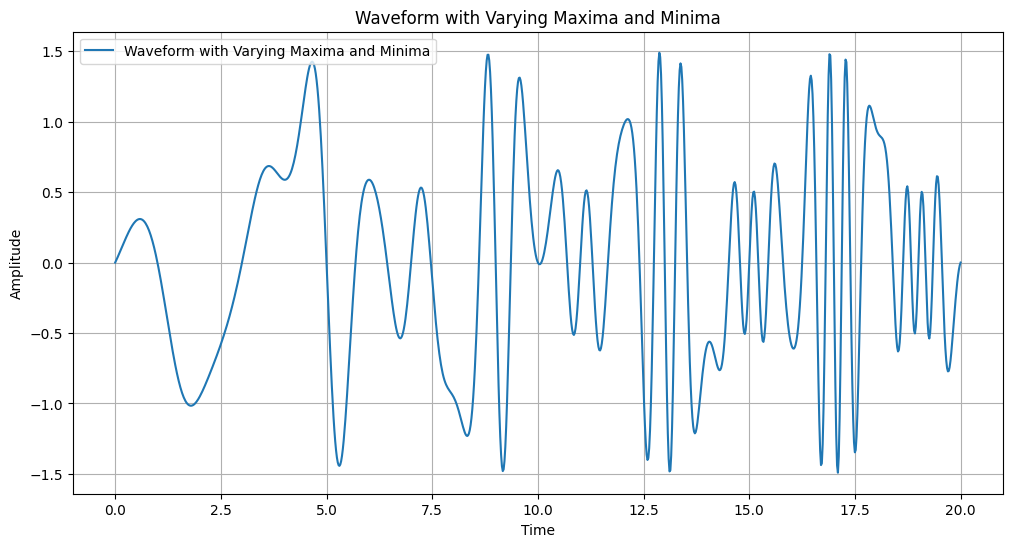

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
t_start = 0
t_end = 20
num_points = 1000

# Create a time array
t = np.linspace(t_start, t_end, num_points)

# Define a base waveform
# Using a sinusoid for the base waveform
base_waveform = np.sin(2 * np.pi * t)

# Define a varying amplitude function to modulate the waveform
# This function creates varying levels of amplitude
amplitude_variation = 1 + 0.5 * np.sin(0.5 * np.pi * t)

# Define a varying frequency function to modulate the waveform
# This function creates varying frequencies over time
frequency_variation = 0.1 * np.cos(0.5 * np.pi * t)

# Generate the final waveform by modulating both amplitude and frequency
waveform = amplitude_variation * np.sin(2 * np.pi * frequency_variation * t)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t, waveform, label='Waveform with Varying Maxima and Minima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform with Varying Maxima and Minima')
plt.legend()
plt.grid(True)
plt.show()


# Simple find_peaks() example with no parameter tuning
Next, let's apply find_peaks to find the maxima and minima

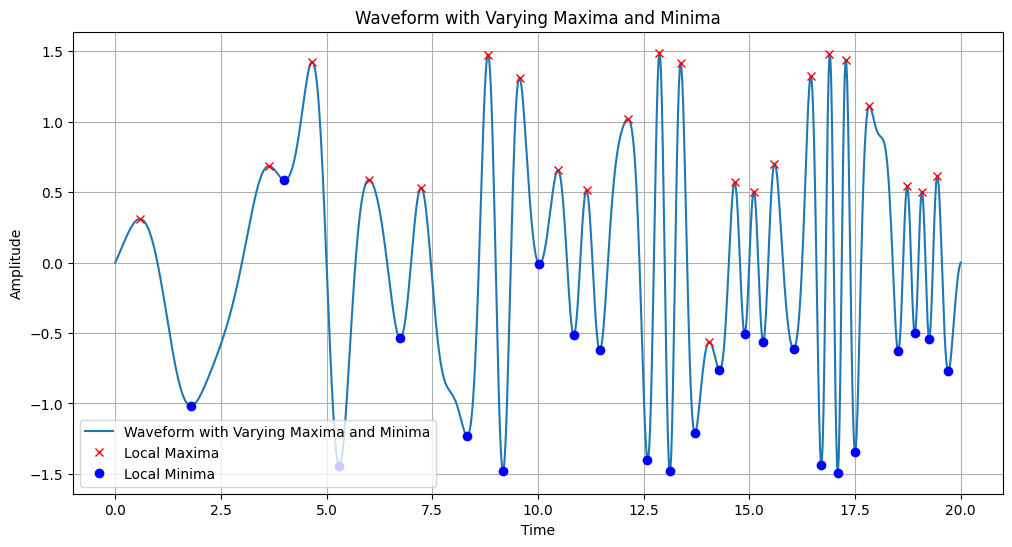

In [36]:
# Find local maxima
peaks, _ = find_peaks(waveform)

# Find local minima (by analyzing the negative of the waveform)
troughs, _ = find_peaks(-waveform)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t, waveform, label='Waveform with Varying Maxima and Minima')
plt.plot(t[peaks], waveform[peaks], 'rx', label='Local Maxima')
plt.plot(t[troughs], waveform[troughs], 'bo', label='Local Minima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform with Varying Maxima and Minima')
plt.legend()
plt.grid(True)
plt.show()

##Setting the fine_peaks() height parameter
Now let's modify the parameters of find_peaks to change the result

**height** allows us to specify the minimum height of peaks, thus height=1 will find peaks at a height greater than 1.

As you can see from the result, peaks that are lower than 1 are removed. This is useful for applcations such as spectrum analysis where we are trying to identify noise peaks above the signal.

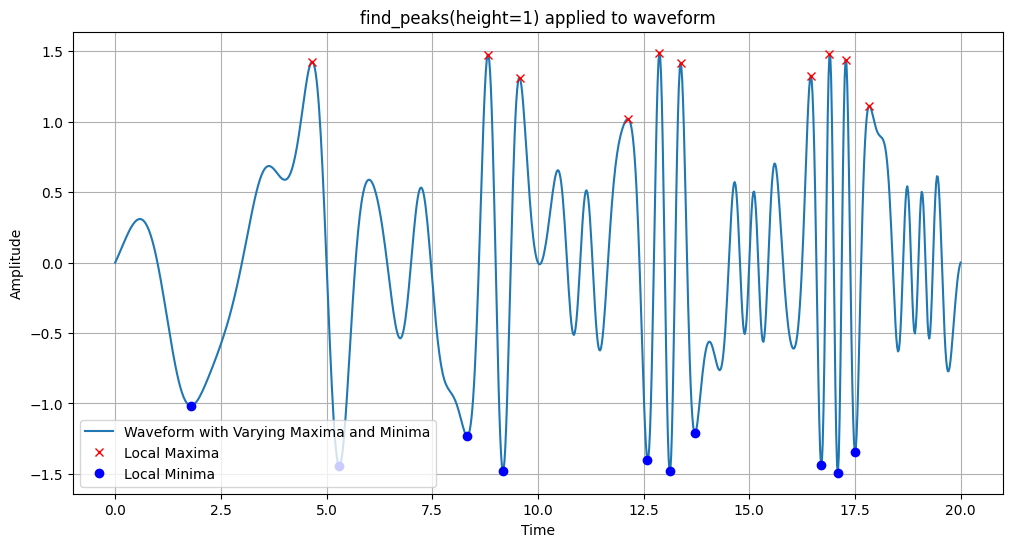

In [37]:
# Find local maxima
peaks_height, _ = find_peaks(waveform, height=1)

# Find local minima (by analyzing the negative of the waveform)
troughs_height, _ = find_peaks(-waveform, height=1)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t, waveform, label='Waveform with Varying Maxima and Minima')
plt.plot(t[peaks_height], waveform[peaks_height], 'rx', label='Local Maxima')
plt.plot(t[troughs_height], waveform[troughs_height], 'bo', label='Local Minima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('find_peaks(height=1) applied to waveform')
plt.legend()
plt.grid(True)
plt.show()

## Setting the find_peaks() threshold parameter

**threshold** sets the minimum vertical distance required between a peak and its neighboring samples. This is useful for finding anomalyis data points, such as noise

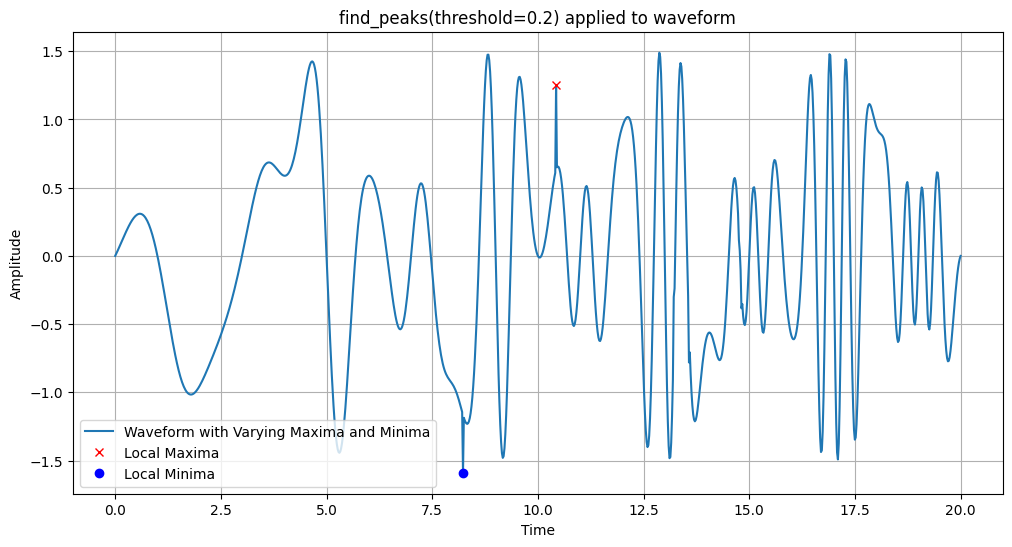

In [38]:
# first create some anomilies

# Add outliers
np.random.seed(42)  # For reproducibility
num_outliers = 6
outlier_indices = np.random.choice(len(t), num_outliers, replace=False)
outlier_magnitude = 2  # Change this to control the outlier magnitude

# Introduce outliers by modifying waveform values at the selected indices
waveform_noisy = waveform.copy()
waveform_noisy[outlier_indices] *= outlier_magnitude * (np.random.rand(num_outliers))  # Random values between -outlier_magnitude and outlier_magnitude

# Find local maxima. The peak must be 0.2 above it's neighbouring samples.
peaks_threshold, _ = find_peaks(waveform_noisy, threshold=0.2)

# Find local minima (by analyzing the negative of the waveform). . The trough must be 0.2 below it's neighbouring samples.
troughs_threshold, _ = find_peaks(-waveform_noisy, threshold=0.2)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t, waveform_noisy, label='Waveform with Varying Maxima and Minima')
plt.plot(t[peaks_threshold], waveform_noisy[peaks_threshold], 'rx', label='Local Maxima')
plt.plot(t[troughs_threshold], waveform_noisy[troughs_threshold], 'bo', label='Local Minima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('find_peaks(threshold=0.2) applied to waveform')
plt.legend()
plt.grid(True)
plt.show()

## Setting the find_peaks() **distance** parameter

**distance** specifies the minimum number of samples between adjacent peaks

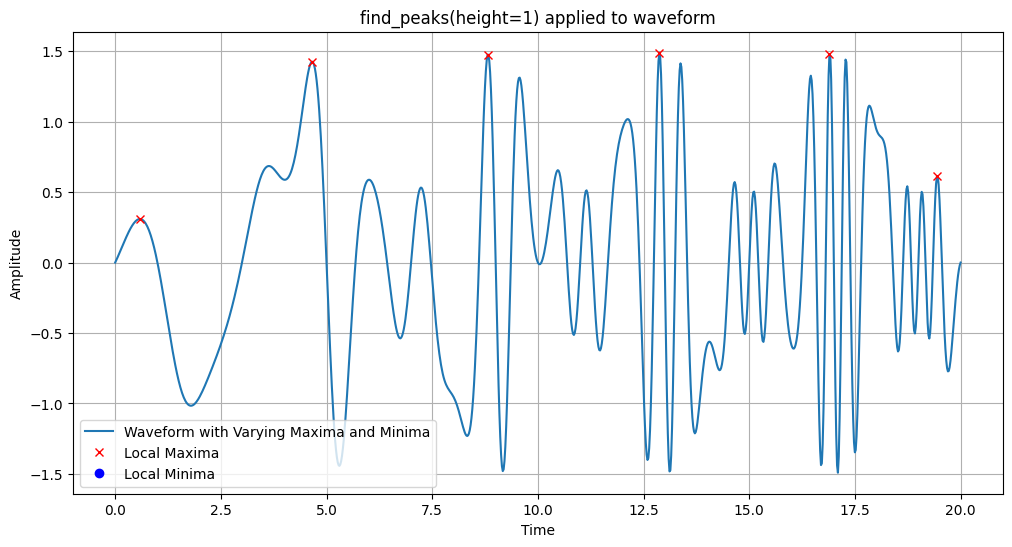

In [39]:
# Find local maxima
peaks_distance_limited, _ = find_peaks(waveform, distance=50)

# Find local minima (by analyzing the negative of the waveform)
troughs_distance_limited, _ = find_peaks(-waveform, height=50)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t, waveform, label='Waveform with Varying Maxima and Minima')
plt.plot(t[peaks_distance_limited], waveform[peaks_distance_limited], 'rx', label='Local Maxima')
plt.plot(t[troughs_distance_limited], waveform[troughs_distance_limited], 'bo', label='Local Minima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('find_peaks(height=1) applied to waveform')
plt.legend()
plt.grid(True)
plt.show()